In [242]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples ,silhouette_score

In [243]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.cm as cm

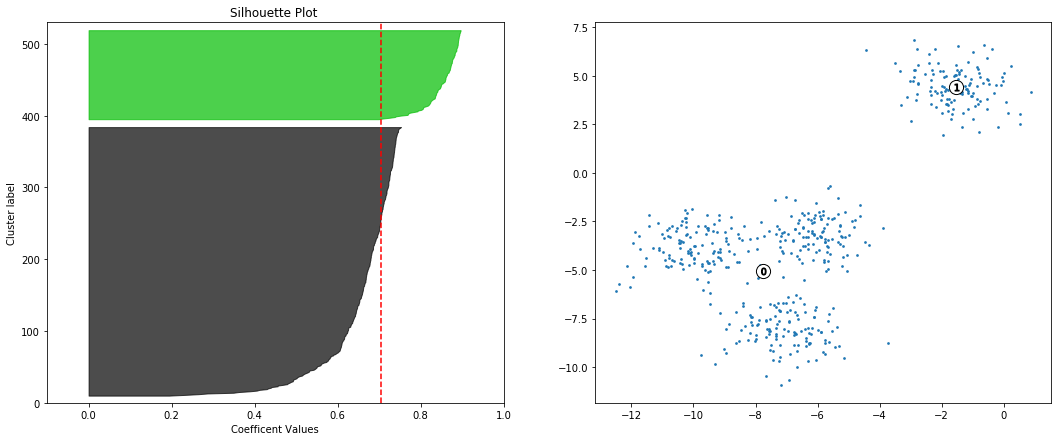

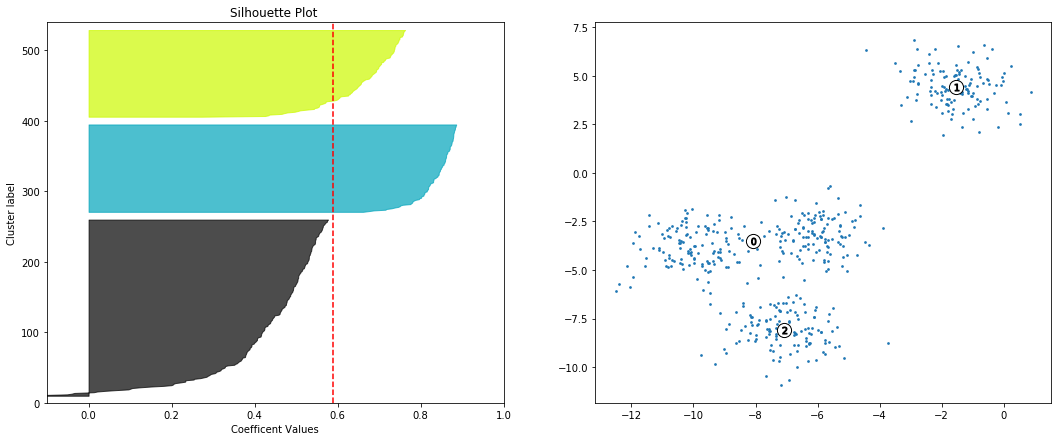

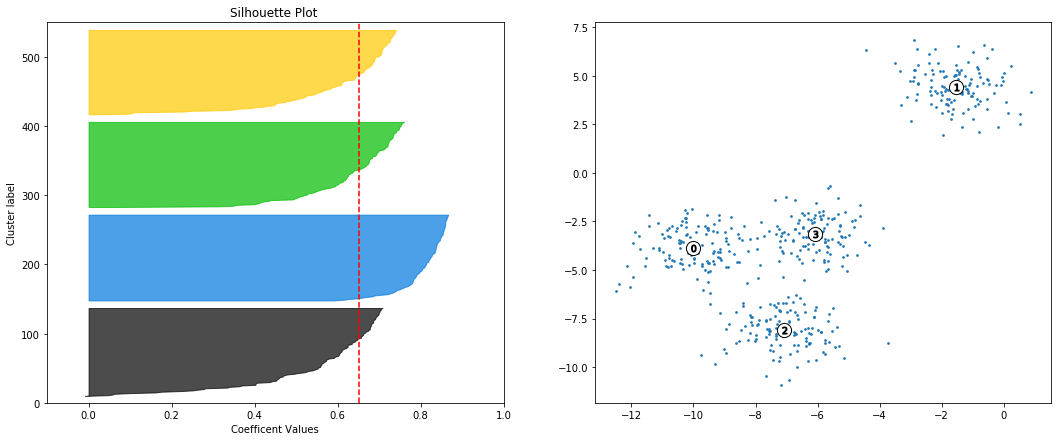

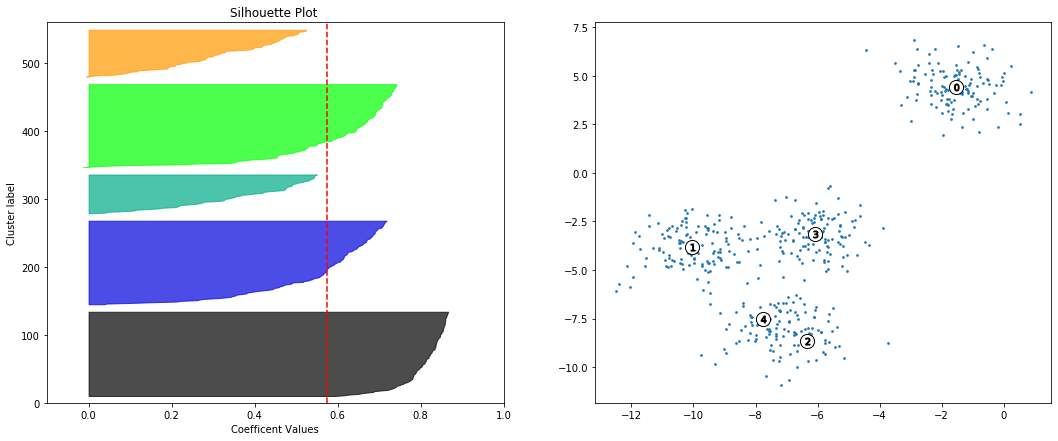

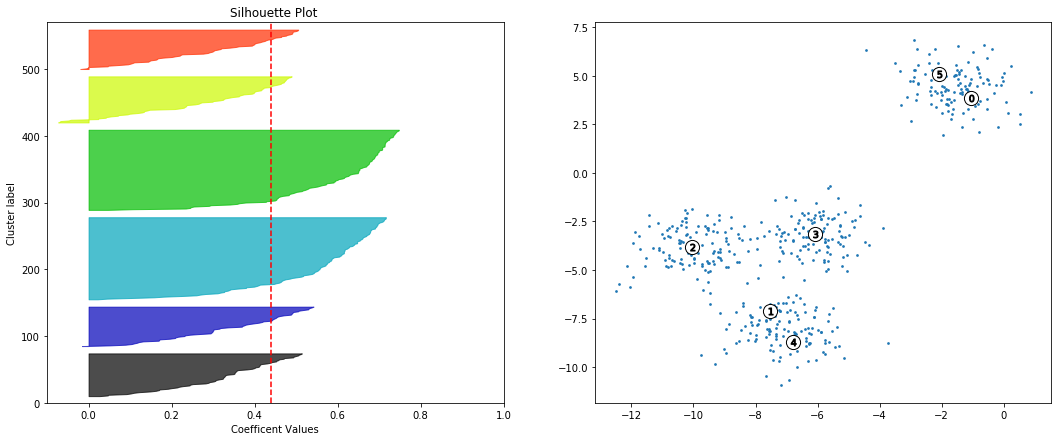

In [244]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers =4,cluster_std =1,shuffle = True, random_state =1)
range_n_cluster = [2,3,4,5,6]
for n_clusters in range_n_cluster:
    
    fig , (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X) + (n_clusters+1)*10])
    
    cluster = KMeans(n_clusters = n_clusters,random_state = 10)
    cluster_label = cluster.fit_predict(X)
    
    silhouette_avg = silhouette_score (X,cluster_label)
    
    sample_silhouette = silhouette_samples(X,cluster_label)
    
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster = sample_silhouette[cluster_label == i]
        
         
        ith_cluster.sort()
        size_cluster = ith_cluster.shape[0]
        y_upper = y_lower + size_cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower,y_upper), 0, ith_cluster, facecolor = color, edgecolor = color, alpha = 0.7)
        
        y_lower =  y_upper +10
    
    ax1.set_title ("Silhouette Plot ")
    ax1.set_xlabel("Coefficent Values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x = silhouette_avg, color = 'red', linestyle = '--')
    
    ax2.scatter(X[:,0],X[:,1], marker = ".", s= 30, lw = 0,alpha =1)
    
    centers = cluster.cluster_centers_
    
    ax2.scatter(centers[:,0],centers [:,1], marker ='o', c ='white', alpha = 1, s = 200, edgecolor ='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker ='$%d$' % i, c ='white', alpha = 1, s = 50, edgecolor ='k')
        
        
plt.show()

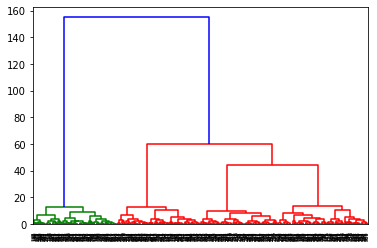

In [245]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers =4,cluster_std =1,shuffle = True, random_state =1)

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

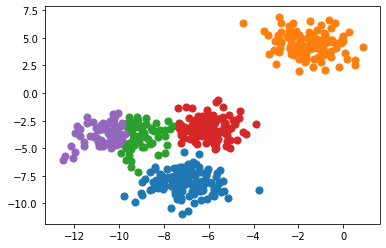

In [246]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5 , affinity= 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(X)
plt.scatter(X[y_hc==0,0], X[y_hc ==0,1], s= 50 )
plt.scatter(X[y_hc==1,0], X[y_hc ==1,1], s= 50 )
plt.scatter(X[y_hc==2,0], X[y_hc ==2,1], s= 50 )
plt.scatter(X[y_hc==3,0], X[y_hc ==3,1], s= 50 )
plt.scatter(X[y_hc==4,0], X[y_hc ==4,1], s= 50 )
plt.show()

# Elbow Method

In [247]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

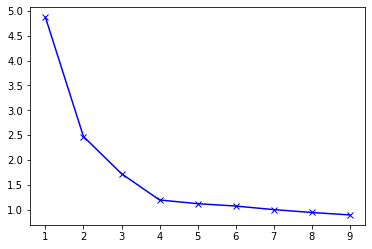

In [248]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 4, shuffle = True, random_state = 1)
K=range(1,10)
mean =[]
for k in K:
    km = KMeans(n_clusta ers=k,random_state=10)
    km.fit_predict(X)
    mean.append(sum(np.min(cdist(X,km.cluster_centers_, 'euclidean'),axis=1))/X.shape[0])
    
plt.plot(K,mean,'bx-')
plt.show()

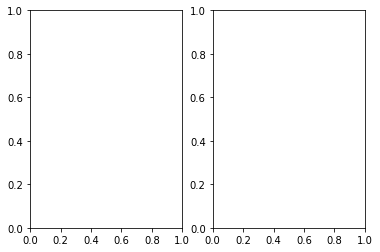

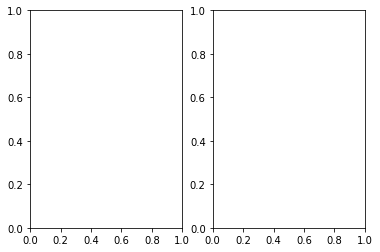

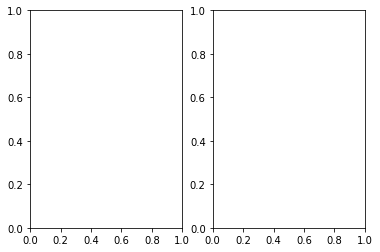

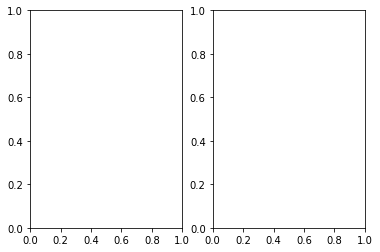

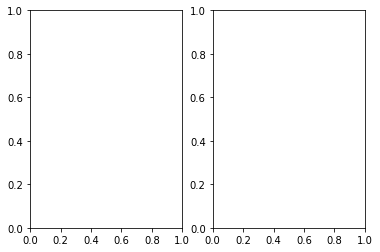

In [249]:
import numpy as np
Z,y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std =1,shuffle = True, random_state = 1)
K=[2,3,4,5,6]
for n_cluster in K:
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    ax1.set_xlim =([-0.1,1])
    ax1.set_ylim =([0,len(Z) + (n_cluster+1)*10])
    cluster = KMeans(n_clusters = n_cluster, random_state = 10)
    cluster_label = cluster.fit_predict(Z)
    silhouette_avg = silhouette_score (Z,cluster_label)
    sample_silhouette = silhouette_samples(Z,cluster_label)
                    
                    

In [250]:
X,y = make_blobs(n_samples = 500, n_features =2,random_state =10,centers =4)

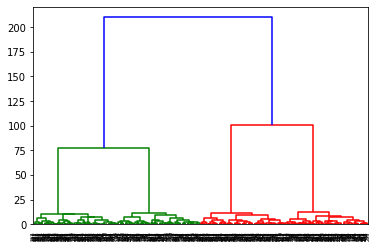

In [251]:
import scipy.cluster.hierarchy as sch
dendo = sch.dendrogram(sch.linkage(X,method ='ward'))
plt.show()

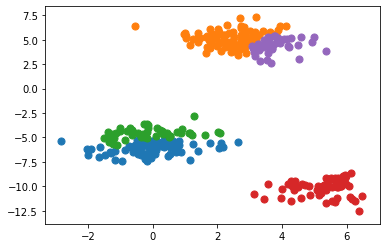

In [252]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering( n_clusters = 10, affinity ='euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.scatter(X[y_hc==0,0], X[y_hc ==0,1], s= 50 )
plt.scatter(X[y_hc==1,0], X[y_hc ==1,1], s= 50 )
plt.scatter(X[y_hc==2,0], X[y_hc ==2,1], s= 50 )
plt.scatter(X[y_hc==3,0], X[y_hc ==3,1], s= 50 )
plt.scatter(X[y_hc==4,0], X[y_hc ==4,1], s= 50 )
plt.show()

In [253]:
X= make_blobs(n_samples = 500, n_features =2, centers = 4,random_state = 10)
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Number of cluster :4
Silhouette Coefficent:{} 0.746315352277818


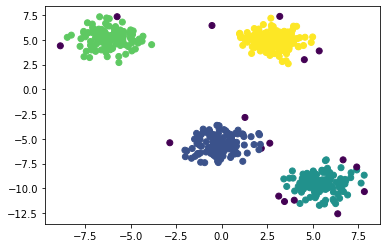

In [259]:
db = DBSCAN(eps= .9,min_samples =10)
y_pred = db.fit_predict(X)
label= db.labels_
plt.scatter(X[:,0],X[:,1], c=y_pred)
print("Number of cluster :{}".format(len(set(y_pred[np.where(y_pred!=-1)]))))
print("Silhouette Coefficent:{}", metrics.silhouette_score(X,label))

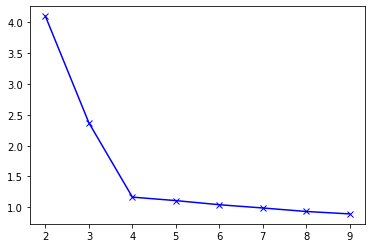

In [258]:
X,y = make_blobs(n_samples = 500, n_features =2,centers =4, random_state =10)
k=range(2,10)
me =[]
for i in k:
    km = KMeans(n_clusters = i, random_state = 10)
    km.fit_predict(X)
    me.append(sum(np.min(cdist(X,km.cluster_centers_, 'euclidean'),axis =1))/ X.shape[0])

    
plt.plot(k,me,'bx-')

plt.show()